<a href="https://colab.research.google.com/github/JhonaGo/BI-Tools/blob/main/Price_Optimization_%26_Elasticity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

##Motivacion

Con el objetivo de comprender la relacion que guarda el comportamiento de la demanda con respecto a los diferentes precios que se ofertan, se lleva adelante el analisis de optimizacion de la demanda. Para este ejercicio se utilizan las variables volumen e ingresos netos a nivel producto.

**Construccion del Dataset**

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
df = pd.read_excel("/content/df26_BI.xlsx")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Billing Date        719 non-null    datetime64[ns]
 1   Descripcion         719 non-null    object        
 2   UD                  719 non-null    int64         
 3   VALOR               719 non-null    float64       
 4   outlier_prediction  719 non-null    int64         
 5   anomaly_score       719 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 33.8+ KB


# Eficiencia de Pareto

In [ ]:
import numpy as np

pareto = pd.pivot_table(data=df,
                           index=["Descripcion"],
                           values=["UD"],
                           aggfunc=np.sum,
                           fill_value=0)

pareto = pareto[~(pareto == 0).all(axis=1)]

pareto = pareto.sort_values(by='UD', ascending=False)


#add column to display cumulative percentage
pareto['cumperc'] = pareto['UD'].cumsum()/pareto['UD'].sum()*100

#view DataFrame
pareto
#pareto.to_excel("pareto.xlsx")

/tmp/ipython-input-4071752332.py:3: FutureWarning: The provided callable <function sum at 0x7cc52c719620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pareto = pd.pivot_table(data=df,


,UD,cumperc
Descripcion,,
Buenisan 400 mg 10 tabs,184119,16.74
Pasta Sanalite Avance 113 mg,172828,32.45
Buenisan 400 mg 20 tabs,148253,45.92
Pasta Sanalite Maximo Alivio y Blaqueador 100 mg,100483,55.06
Pasta Sanalite Magico Alivio 100 mg,76402,62.00
Buenisan 200 mg 12 tabs,57717,67.25
Pasta Sanalite Maximo Alivio 12 Hrs 100 mg,46681,71.49
Pasta Sanalite Maxima Blaqueador 100 mg,37941,74.94
Pasta Sanalite Antisarro 113 mg,36431,78.25


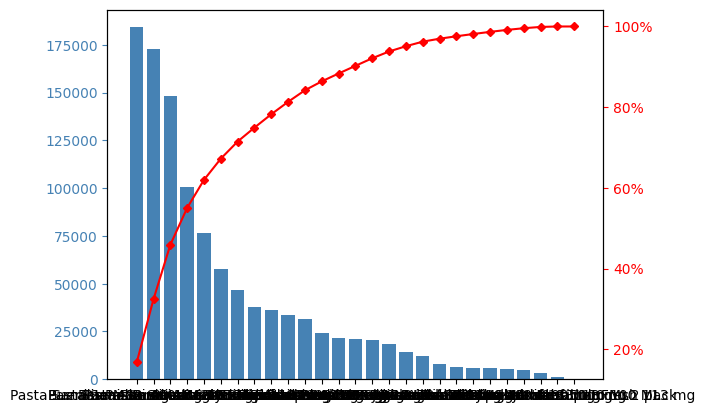

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

#define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 4

#create basic bar plot
fig, ax = plt.subplots()
ax.bar(pareto.index, pareto['UD'], color=color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(pareto.index, pareto['cumperc'], color=color2, marker="D", ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#specify axis colors
ax.tick_params(axis='y', colors=color1)
ax2.tick_params(axis='y', colors=color2)

In [ ]:
dff = df.loc[df['Descripcion']== "Buenisan 400 mg 10 tabs"]

import numpy as np
pivot_table = pd.pivot_table(data=dff,
                           index=["Billing Date", "Descripcion"],
                           values=["UD", "VALOR"],
                           aggfunc=np.sum,
                           fill_value=0)

pivot_table = pivot_table[~(pivot_table == 0).all(axis=1)]

dff = pivot_table.reset_index()

/tmp/ipython-input-3441703307.py:4: FutureWarning: The provided callable <function sum at 0x7cc52c719620> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_table = pd.pivot_table(data=dff,


In [ ]:
dff["precio"] = dff['VALOR']/dff["UD"]
display(dff.describe())

,Billing Date,UD,VALOR,precio
count,18,18.00,18.00,18.00
mean,2024-01-26 04:00:00,1880.72,151494.41,81.12
min,2023-01-01 00:00:00,1016.00,77742.72,73.62
25%,2023-07-08 18:00:00,1523.50,126736.04,80.25
50%,2024-01-01 00:00:00,1794.00,148279.80,80.25
75%,2024-08-24 06:00:00,1978.00,166666.28,84.26
max,2025-03-01 00:00:00,3243.00,238749.66,87.67
std,NaN,635.63,46805.53,4.10


# Frontera de Pareto

In [ ]:
! pip install paretoset

Problema de optimización:

-objetivo 1: minimizar unidades

-objetivo2: maximizar valor

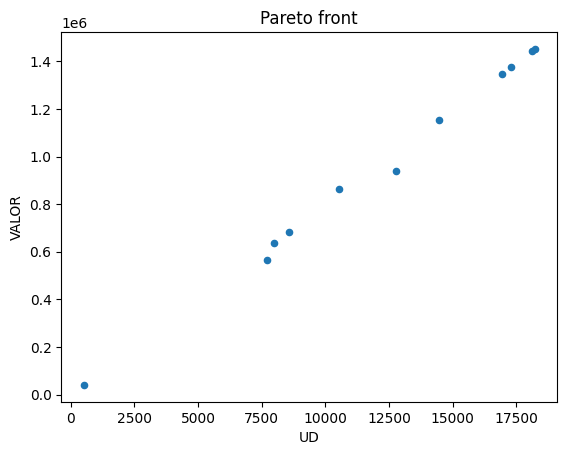

In [ ]:
from paretoset import paretoset
import pandas as pd

s1 = dff.copy()
s1 = s1[["UD", "VALOR"]]

mask = paretoset(s1, sense=["min", "max"], distinct=False)
perfomance = s1[mask]

# grafico
perfomance.plot.scatter(x="UD", y="VALOR", title="Pareto front")

# data frame perfomance
efficient_dff = dff[mask]

efficient_dff.to_excel("efficient.xlsx")

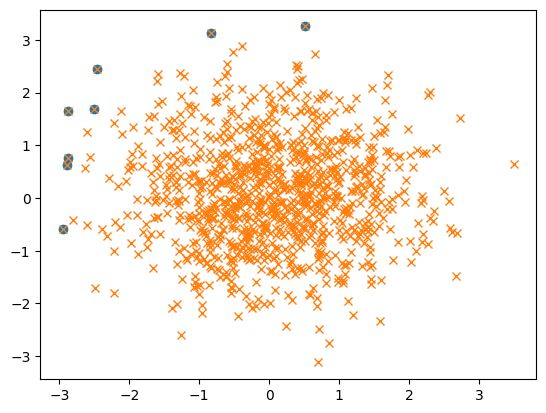

In [ ]:
from paretoset import paretoset
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

# Create Solution objects holding the problem solution and objective values
Solution = namedtuple("Solution", ["solution", "obj_value"])
solutions = [Solution(solution=object, obj_value=np.random.randn(2)) for _ in range(999)]

# Create an array of shape (solutions, objectives) and compute the non-dominated set
objective_values_array = np.vstack([s.obj_value for s in solutions])
mask = paretoset(objective_values_array, sense=["min", "max"])

# Filter the list of solutions, keeping only the non-dominated solutions
efficient_solutions = [solution for (solution, m) in zip(solutions, mask) if m]

# Extract the objective values from the namedtuples for plotting
efficient_obj_values = np.vstack([s.obj_value for s in efficient_solutions])

# plot efficient_obj_values with original values
plt.plot(efficient_obj_values[:, 0], efficient_obj_values[:, 1], 'o', label='Pareto Front')
plt.plot(objective_values_array[:, 0], objective_values_array[:, 1], 'x', label='Original Solutions')

#Elasticidades

## Linear Price Elasticity Model

In [ ]:
#df['VALOR'] = np.log(df['VALOR'].astype(float))
#df['UD'] = np.log(df['UD'].astype(float))

In [ ]:
# Replace zero and negative values with a small positive number to avoid issues with np.log

#df['VALOR'] = df['VALOR'].replace(0, 1e-10)  # Replace 0 with a small positive number
#df.loc[df['VALOR'] < 0, 'VALOR'] = 1e-10 # Replace negative with a small positive number

#df['UD'] = df['UD'].replace(0, 1e-10)  # Replace 0 with a small positive number
#df.loc[df['UD'] < 0, 'UD'] = 1e-10 # Replace negative with a small positive number

In [ ]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [ ]:
#construccion del modelo OLS
x_value = dff['VALOR']
y_value = dff['UD']
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     UD   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     662.9
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           1.89e-14
Time:                        00:30:22   Log-Likelihood:                -107.48
No. Observations:                  18   AIC:                             219.0
Df Residuals:                      16   BIC:                             220.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -152.2298     82.440     -1.847      0.0

Coeficientes de la funcion lineal

In [ ]:
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params

mean_price=dff['VALOR'].mean()
mean_quantity=dff['UD'].mean()

#Linear Price elasticity Formula
price_elasticity = round((slope)*(mean_price/mean_quantity),2)

print('Linear Price Elasticity {} with pvalue {}'\
.format(price_elasticity, coefficient_pvalue))

Linear Price Elasticity 1.08 with pvalue 1.888295964761286e-14


## Funcion No lineal de la elasticidad

In [ ]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import numpy as np

In [ ]:
# regresión por logaritmo

x_value = np.log(dff['VALOR'])
y_value = np.log(dff['UD'])
X = add_constant(x_value)
model = sm.OLS(y_value, X)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     UD   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     694.9
Date:                Mon, 11 Aug 2025   Prob (F-statistic):           1.31e-14
Time:                        00:30:22   Log-Likelihood:                 28.680
No. Observations:                  18   AIC:                            -53.36
Df Residuals:                      16   BIC:                            -51.58
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.7513      0.464    -10.231      0.0

Coeficientes de la funcion no-lineal

In [ ]:
coefficient_pvalue = result.f_pvalue
intercept,slope = result.params

#Non_linear Price elasticity Formula
price_elasticity = round((slope),2)
print('Non_linear Price Elasticity  {} with pvalue {}'.format(price_elasticity, coefficient_pvalue))

Non_linear Price Elasticity  1.03 with pvalue 1.3063040693197897e-14


In [ ]:
import math
#recordar que calculamos el logaritmo de la constante
const=round(math.exp(result.params[0]), 3)
const

/tmp/ipython-input-3970113421.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  const=round(math.exp(result.params[0]), 3)


0.009

#Optimizacion de precios utilizando elasticidades

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Construccion de la funcion <<Elasticidad & Precios>>

In [ ]:
# Set price elasticity range
elasticity = 1.03


# Set price range
price = list(np.linspace(63,70, num=100))
demand = const * np.power(price,elasticity)
revenue = price  * demand
max_revenue = np.max(revenue)
max_index = np.argmax(revenue)
price[max_index]

np.float64(70.0)

Dataset de los resultados

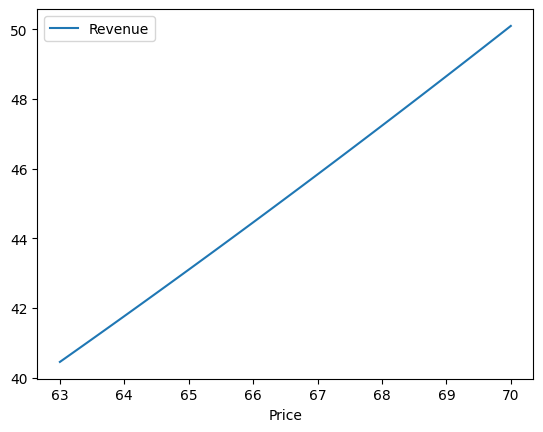

In [ ]:
df = pd.DataFrame({'Price': price, 'Revenue': revenue})

df.plot(x='Price', y='Revenue')

# exportar
df.to_excel('revenue.xlsx')